<a href="https://colab.research.google.com/github/egz956/Python_Work/blob/main/What_conditions_are_comfortable_for_people%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What conditions are comfortable for people?

This notebook is designed to be a practical investigation of the what conditions influence the comfort of occupants in the various contexts that were tested in the ASHRAE Thermal Comfort Database II studies.

We will go through and investigate how temperature, humidity, air movement, and other factors influence comfort. In this analysis, we will use a subset of the larger data set that can be found on the project website: http://www.comfortdatabase.com/

We will use the **Seaborn** library for this task: https://seaborn.pydata.org/


In [1]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/4 - Operations - Statistics and Visualization/")

Mounted at /content/gdrive


In [4]:
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [5]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


In [6]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperature (C)

# Are the conditions that influence people's comfort?

Is it air temperature, humidity, air movement? Other stuff?

Let's use box plots to investigate!

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

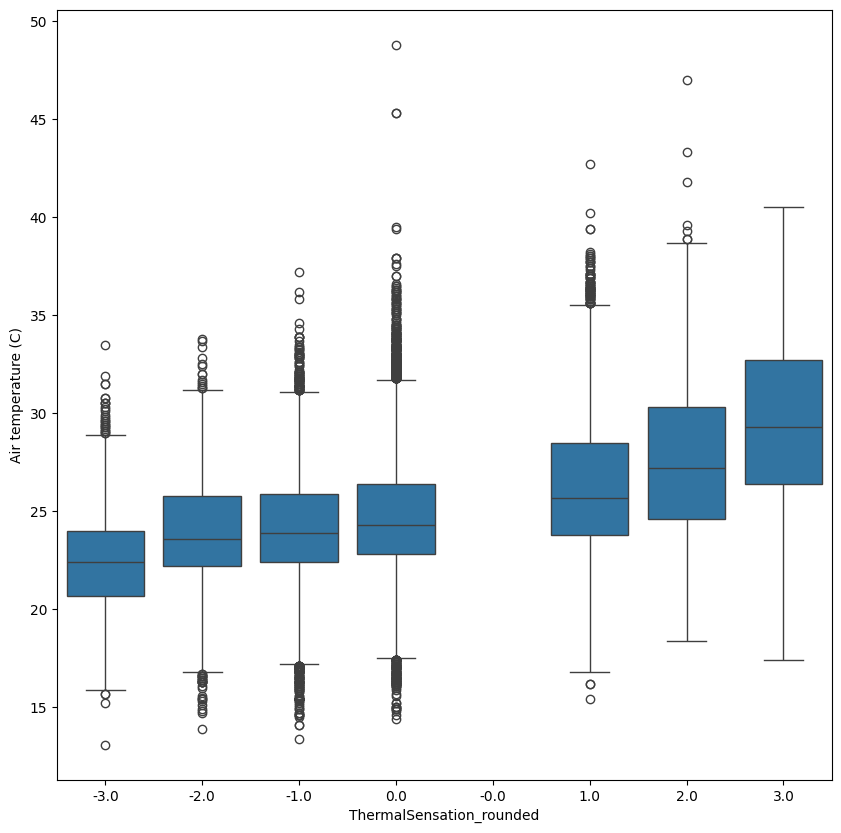

In [7]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ieq_data)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Relative humidity (%)'>

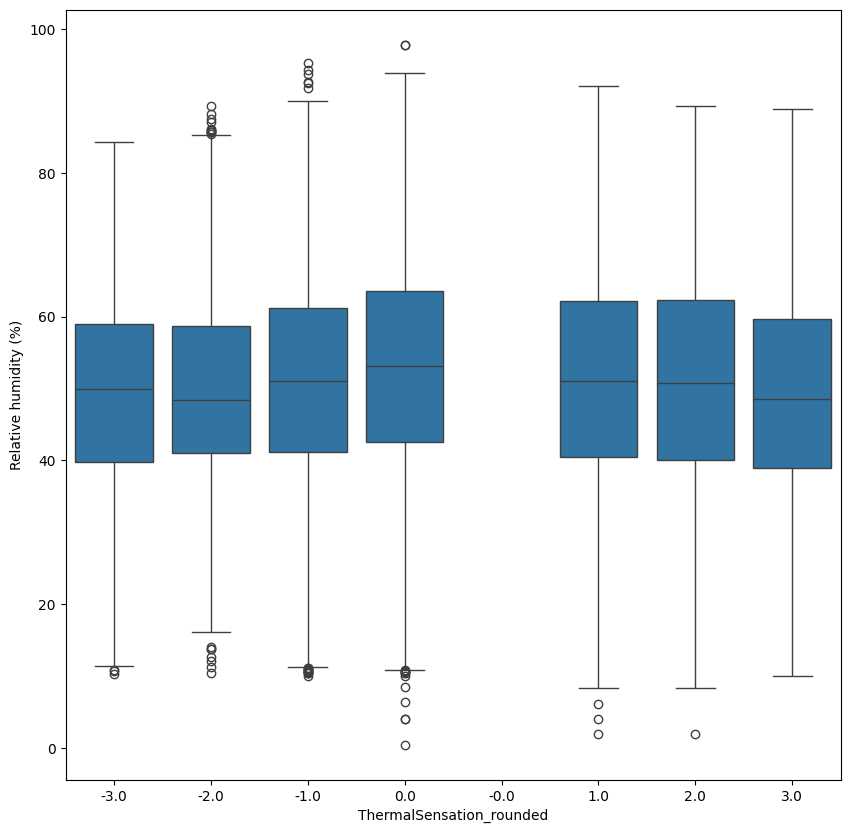

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Relative humidity (%)", data=ieq_data)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air velocity (m/s)'>

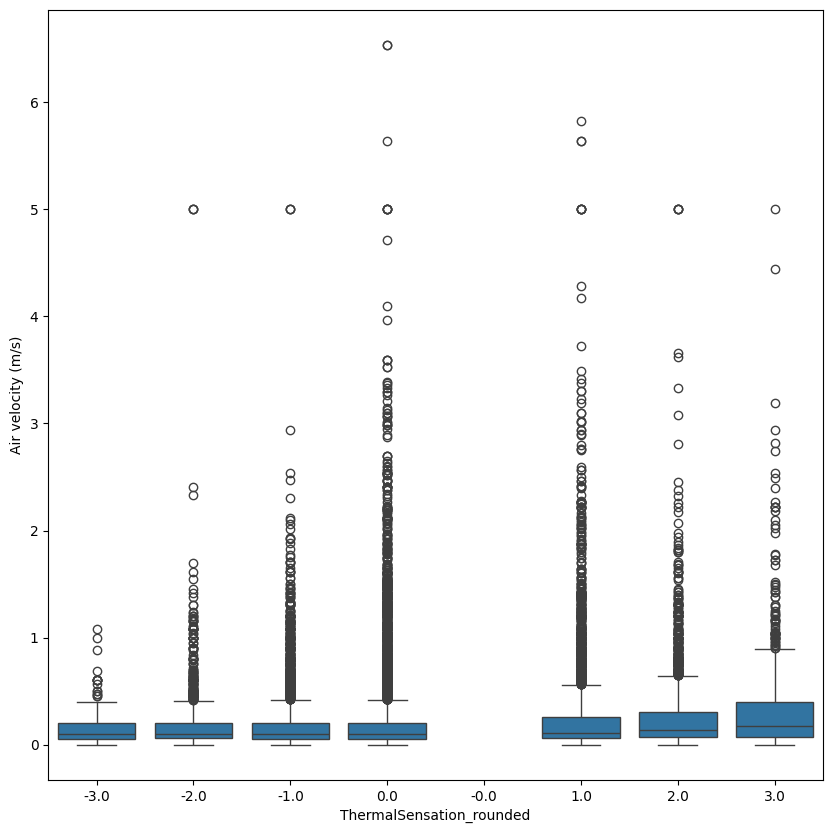

In [9]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air velocity (m/s)", data=ieq_data)

# How about personal attributes? Do they have an impact?

Let's use box plots, but use the `hue=` attribute to add another dimension to the analysis.

In [10]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperature (C)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

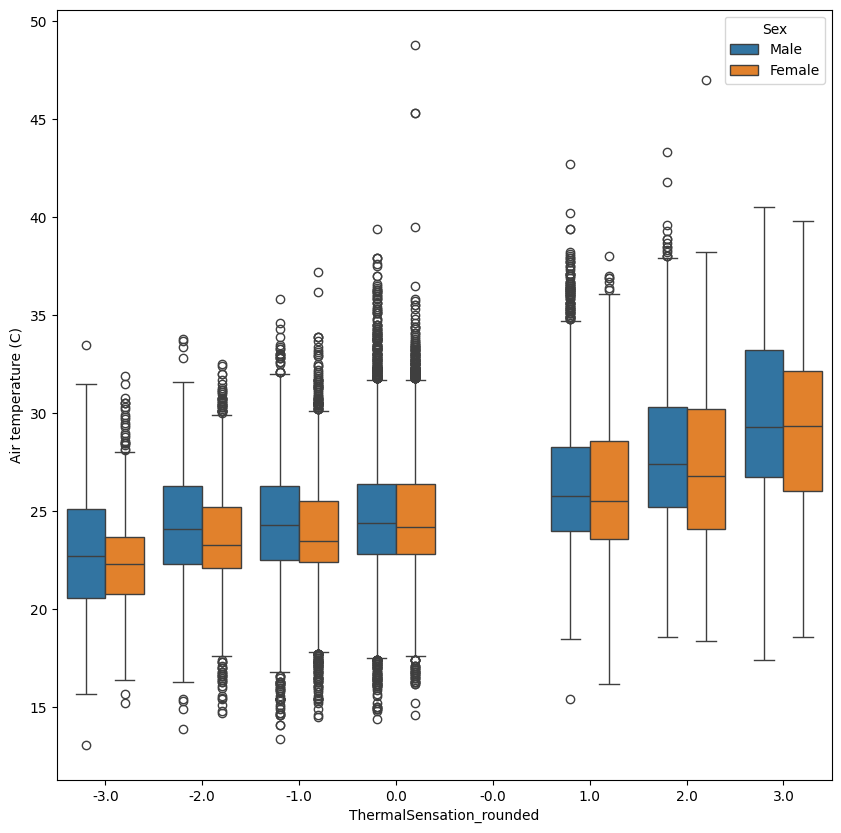

In [11]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Sex", data=ieq_data)

## Using the `.round()` function

Let's use the `.round()` function to create a more categorical set of options for metabolism and clothing levels

In [12]:
ieq_data["Met_rounded"]= ieq_data["Met"].round(0)
ieq_data["Clo_rounded"]= ieq_data["Clo"].round(0)

In [13]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperature (C)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

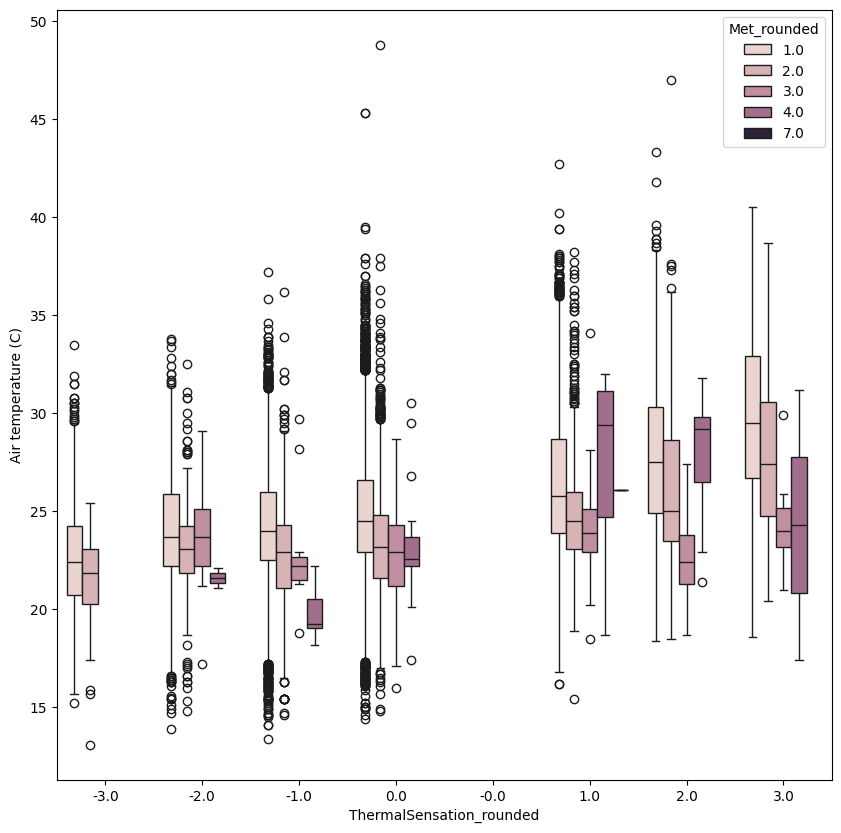

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Met_rounded", data=ieq_data)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

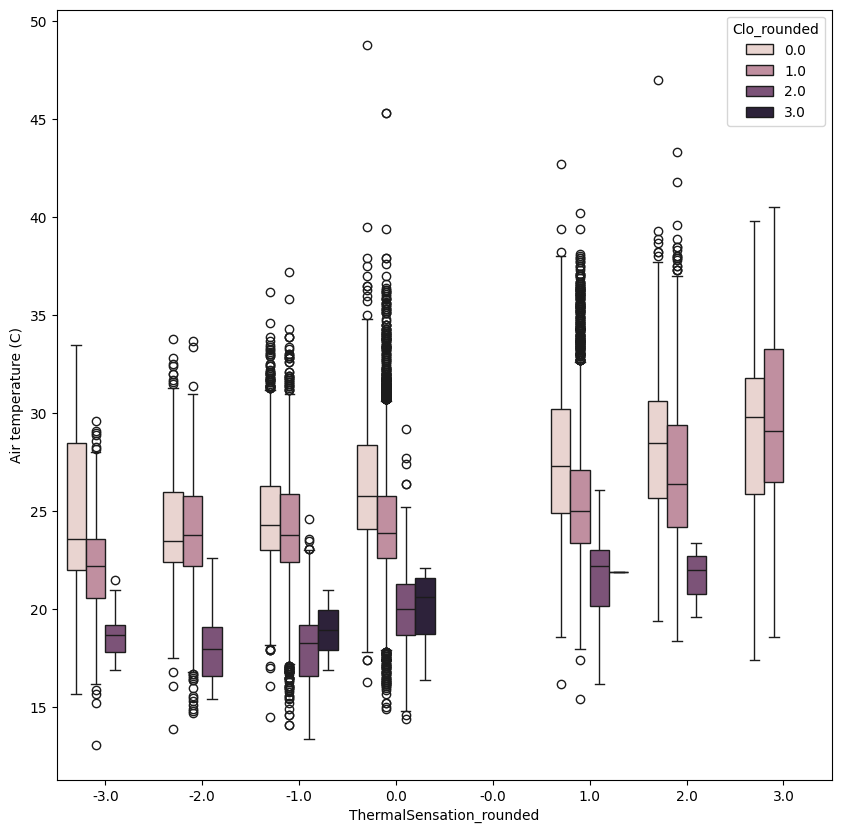

In [15]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Clo_rounded", data=ieq_data)

# How does the type of building or its systems influence people's comfort?

Let's use horizontal box plots to get a sense of the attributes of the built environment and how they influence comfort.

In [16]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperature (C)

<ipython-input-17-f55326872c06>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Building type", x="Thermal sensation",


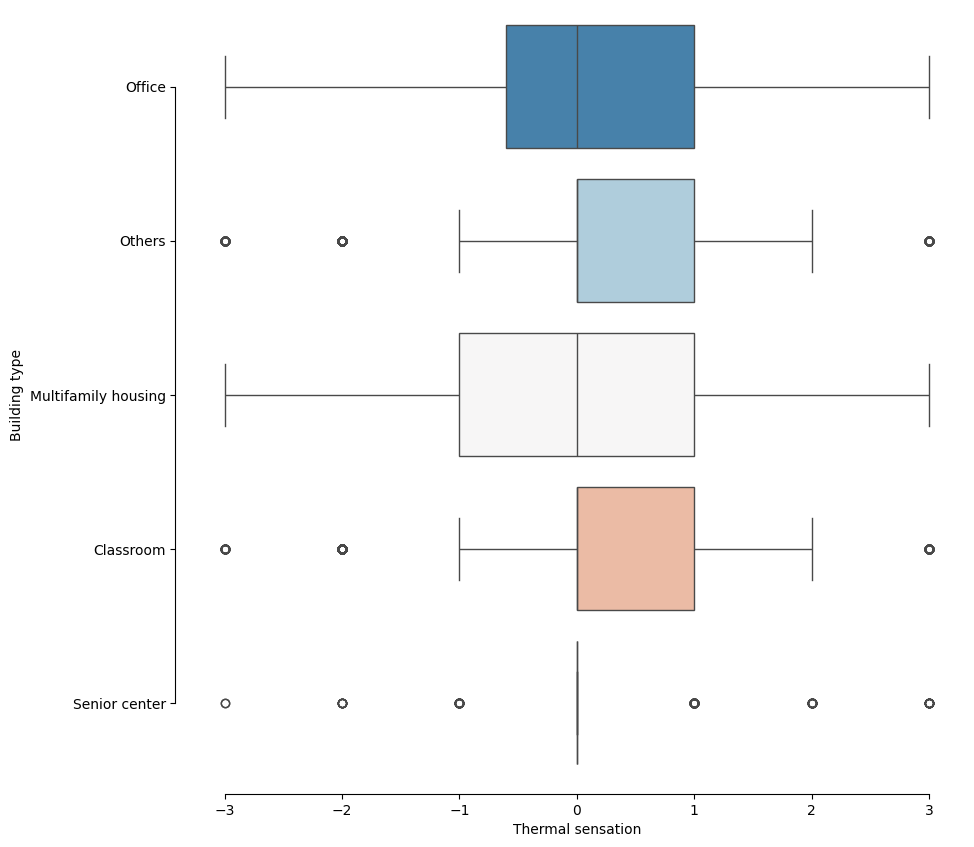

In [17]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Building type", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Building type","Thermal sensation","Sex"]].dropna())

sns.despine(offset=10, trim=True)

<ipython-input-18-e6aa440a0200>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Cooling startegy_building level", x="Thermal sensation",


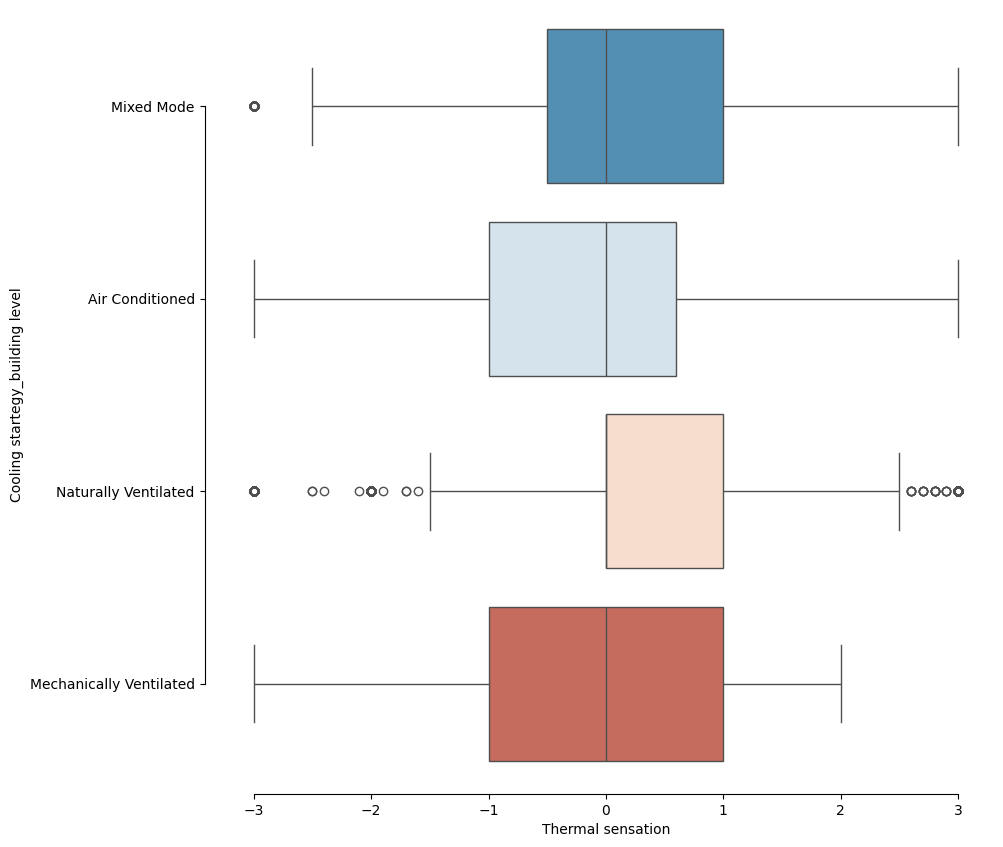

In [18]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Cooling startegy_building level", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Cooling startegy_building level","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

<ipython-input-19-01a5e7bcf12e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Season", x="Thermal sensation",


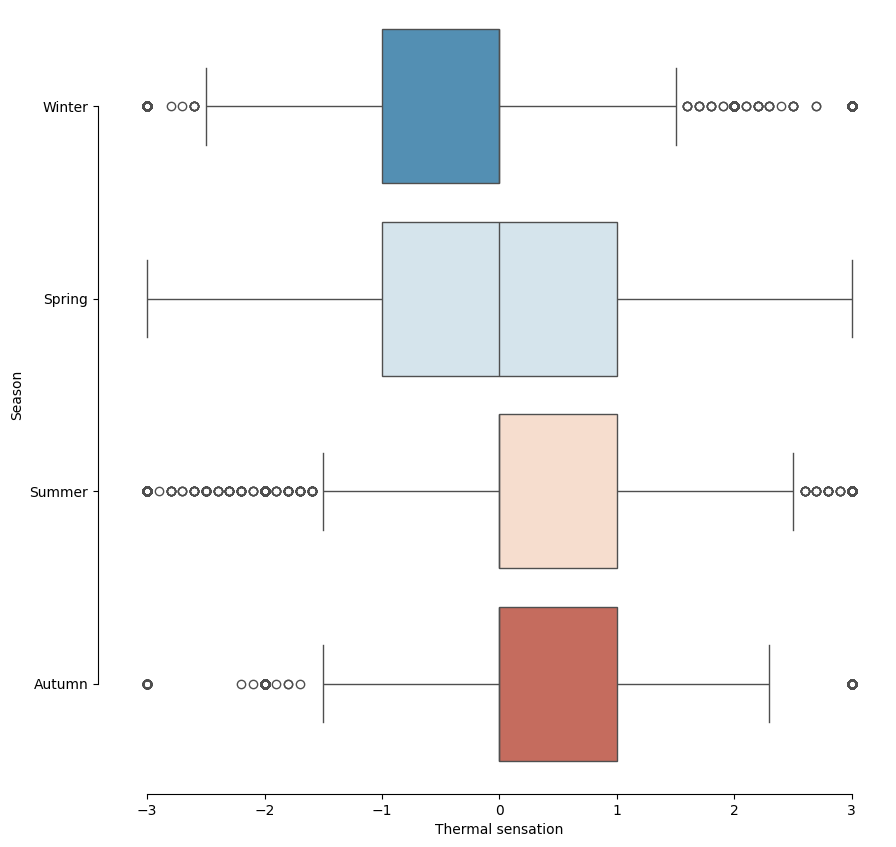

In [19]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Season", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Season","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

# How does the country someone is from influence how they perceive comfort?

Let's use some more advanced box plot techniques to compare the different countries, climates, and other geographical or cultural aspects

In [20]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperature (C)

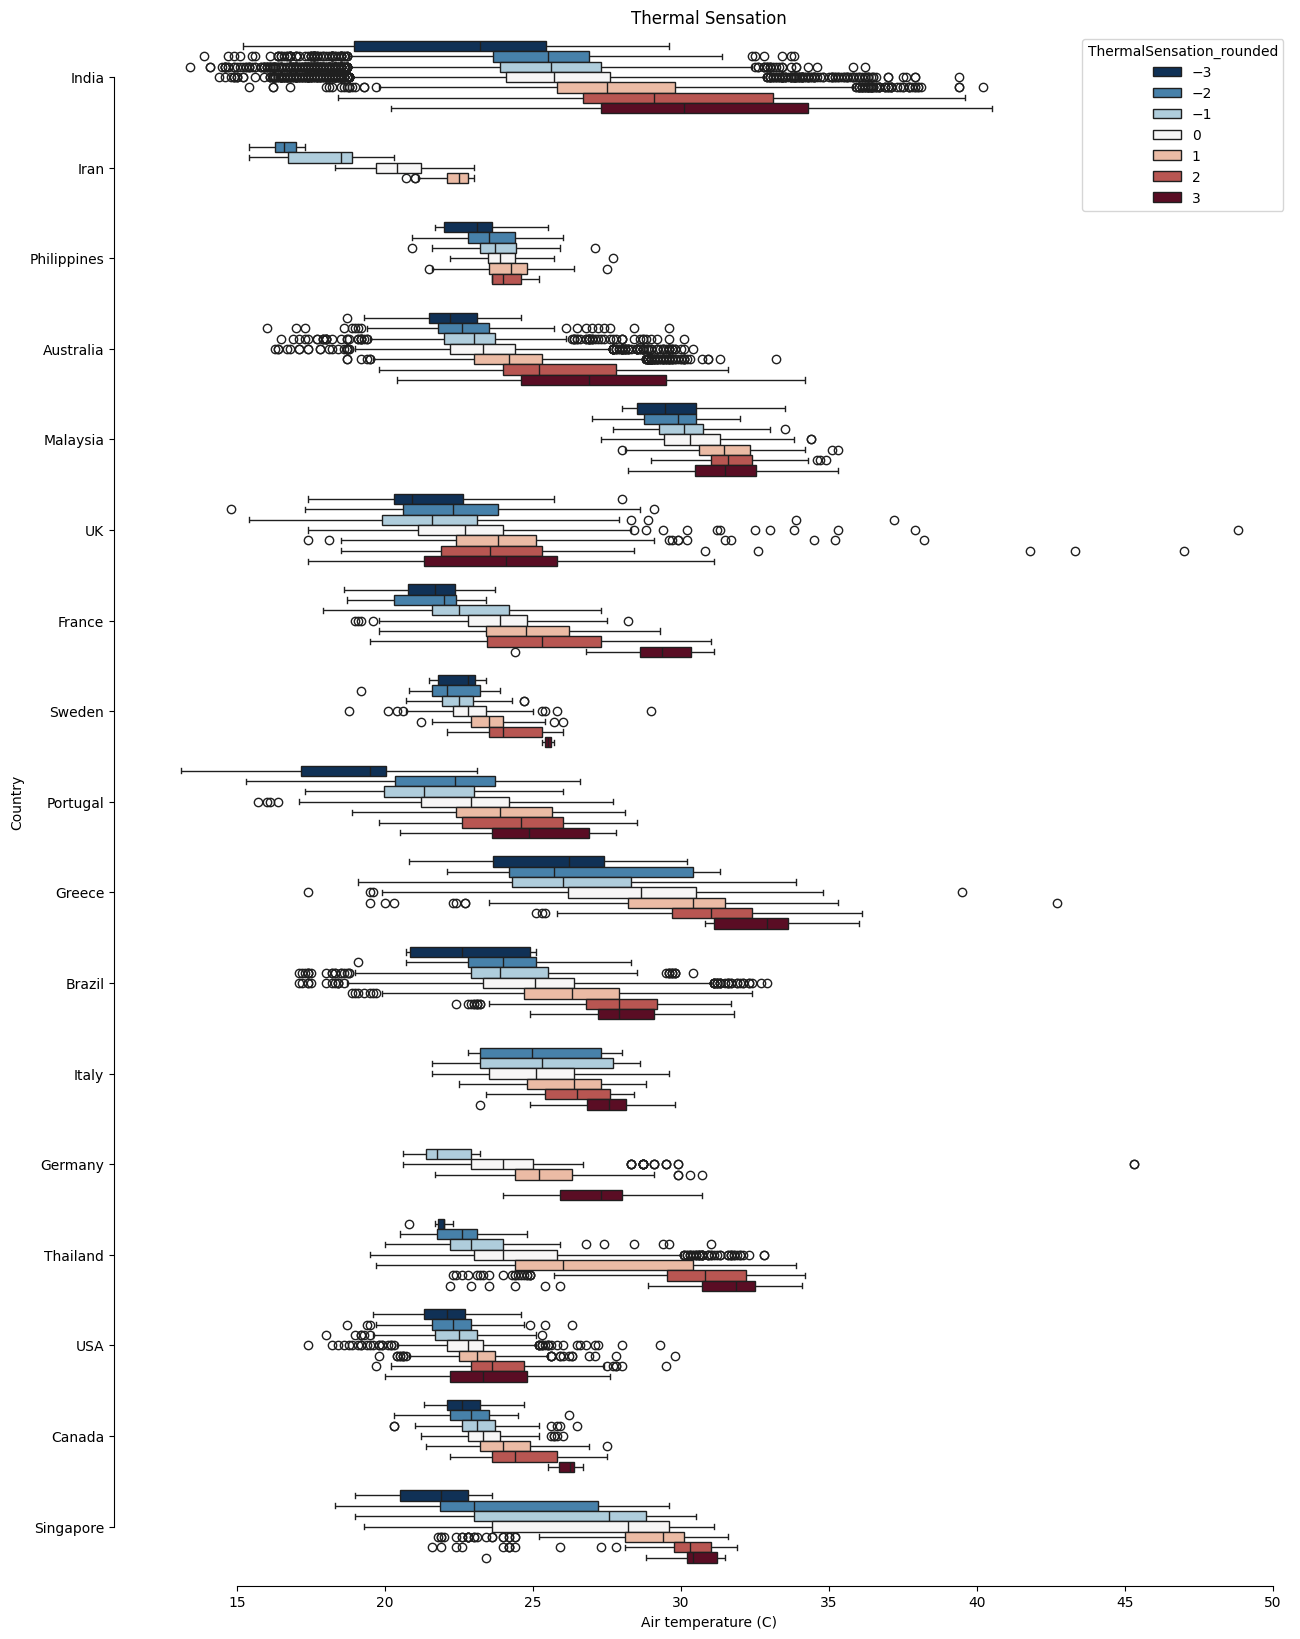

In [21]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,20)
sns.boxplot(y="Country", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Country","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

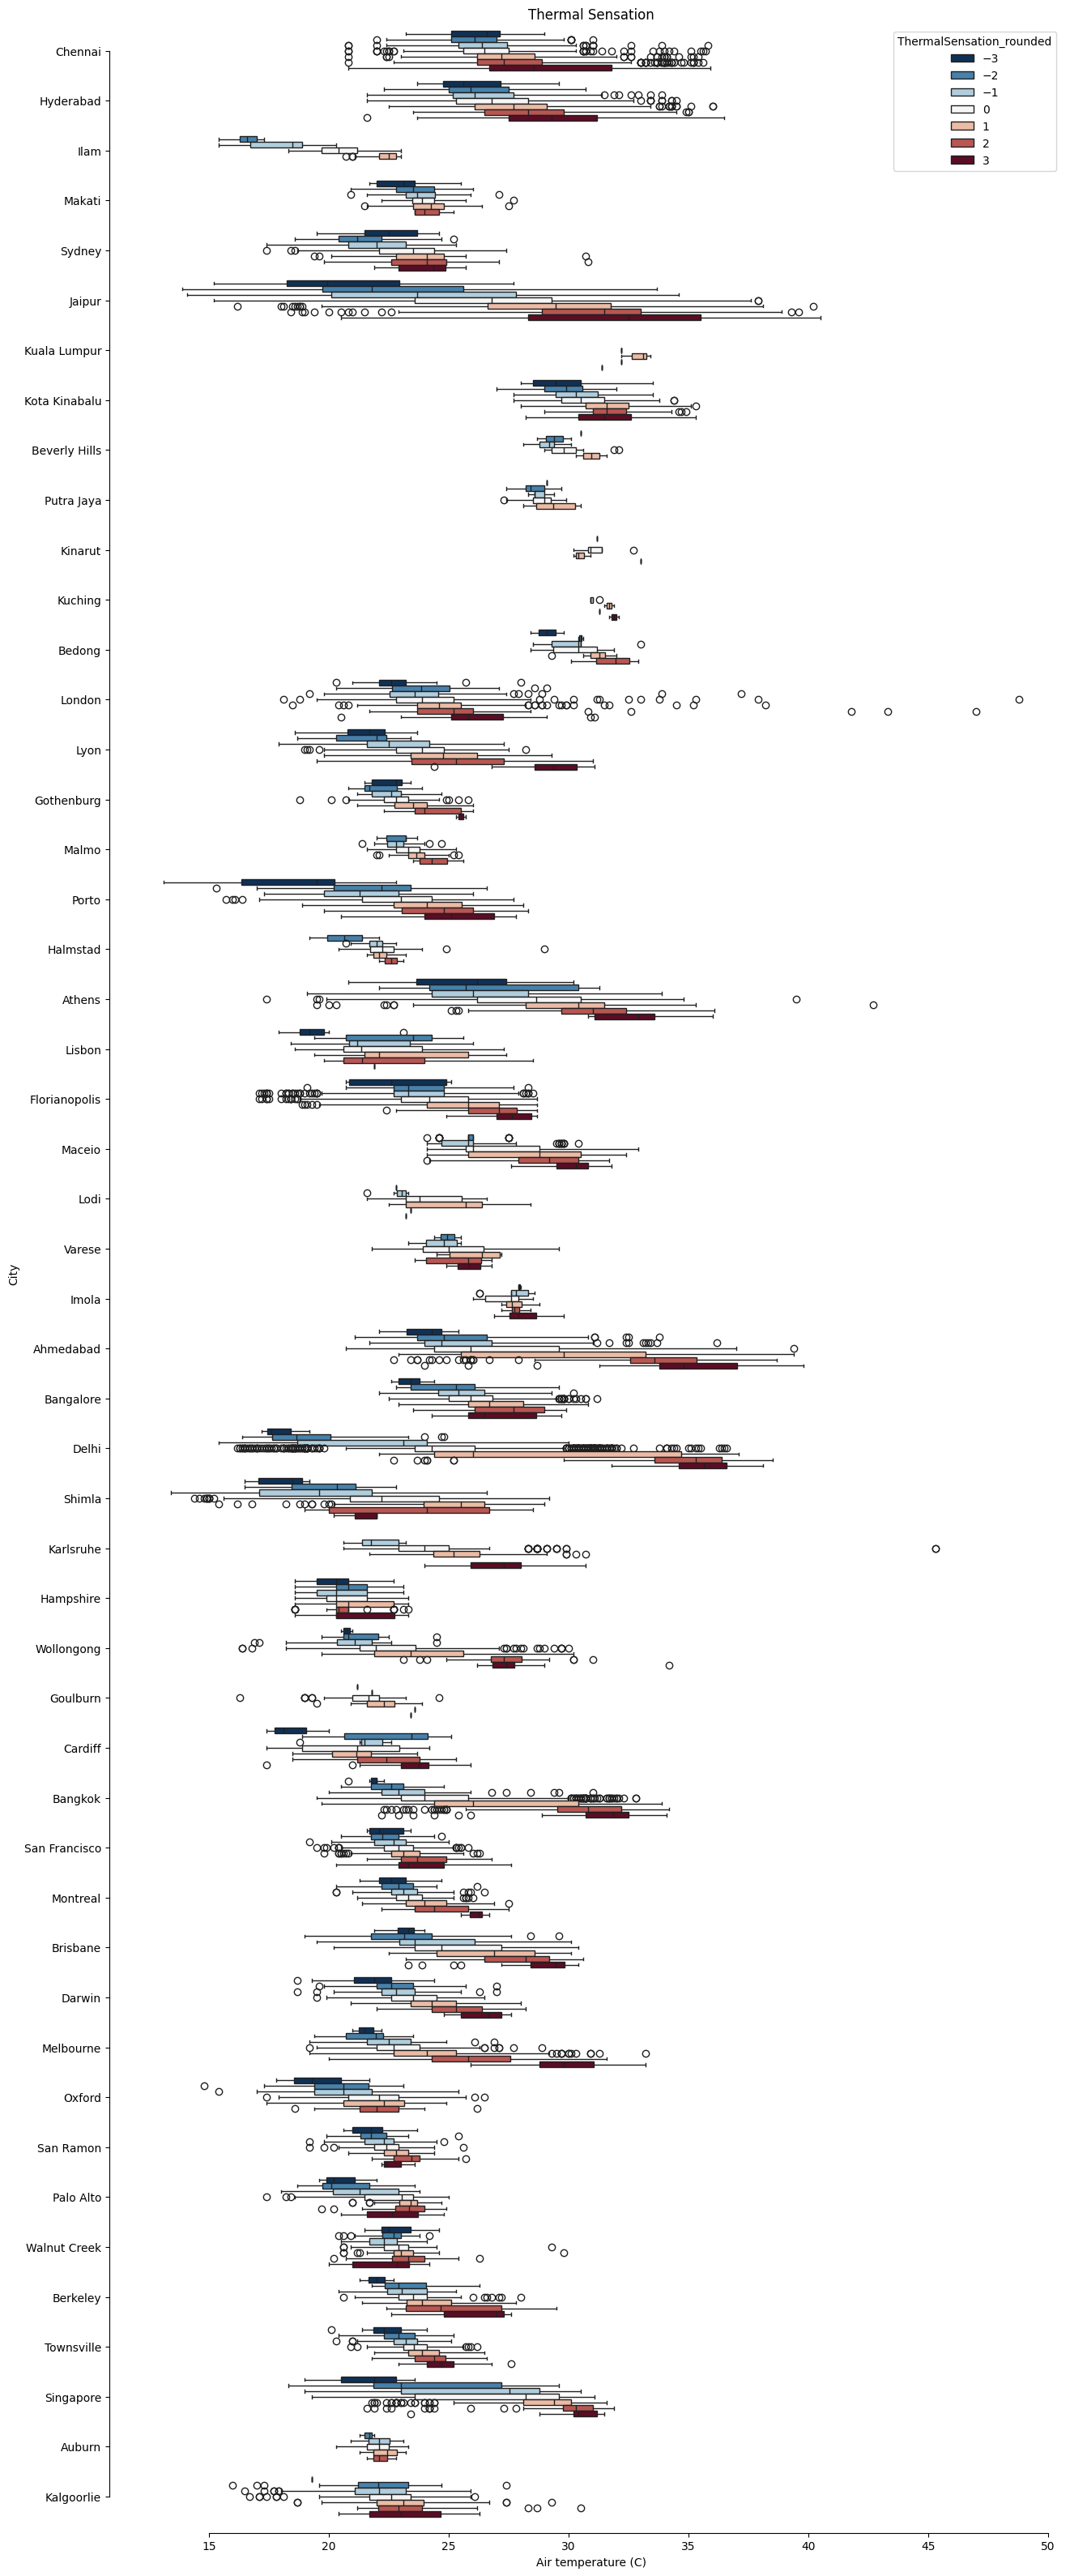

In [22]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,40)
sns.boxplot(y="City", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["City","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

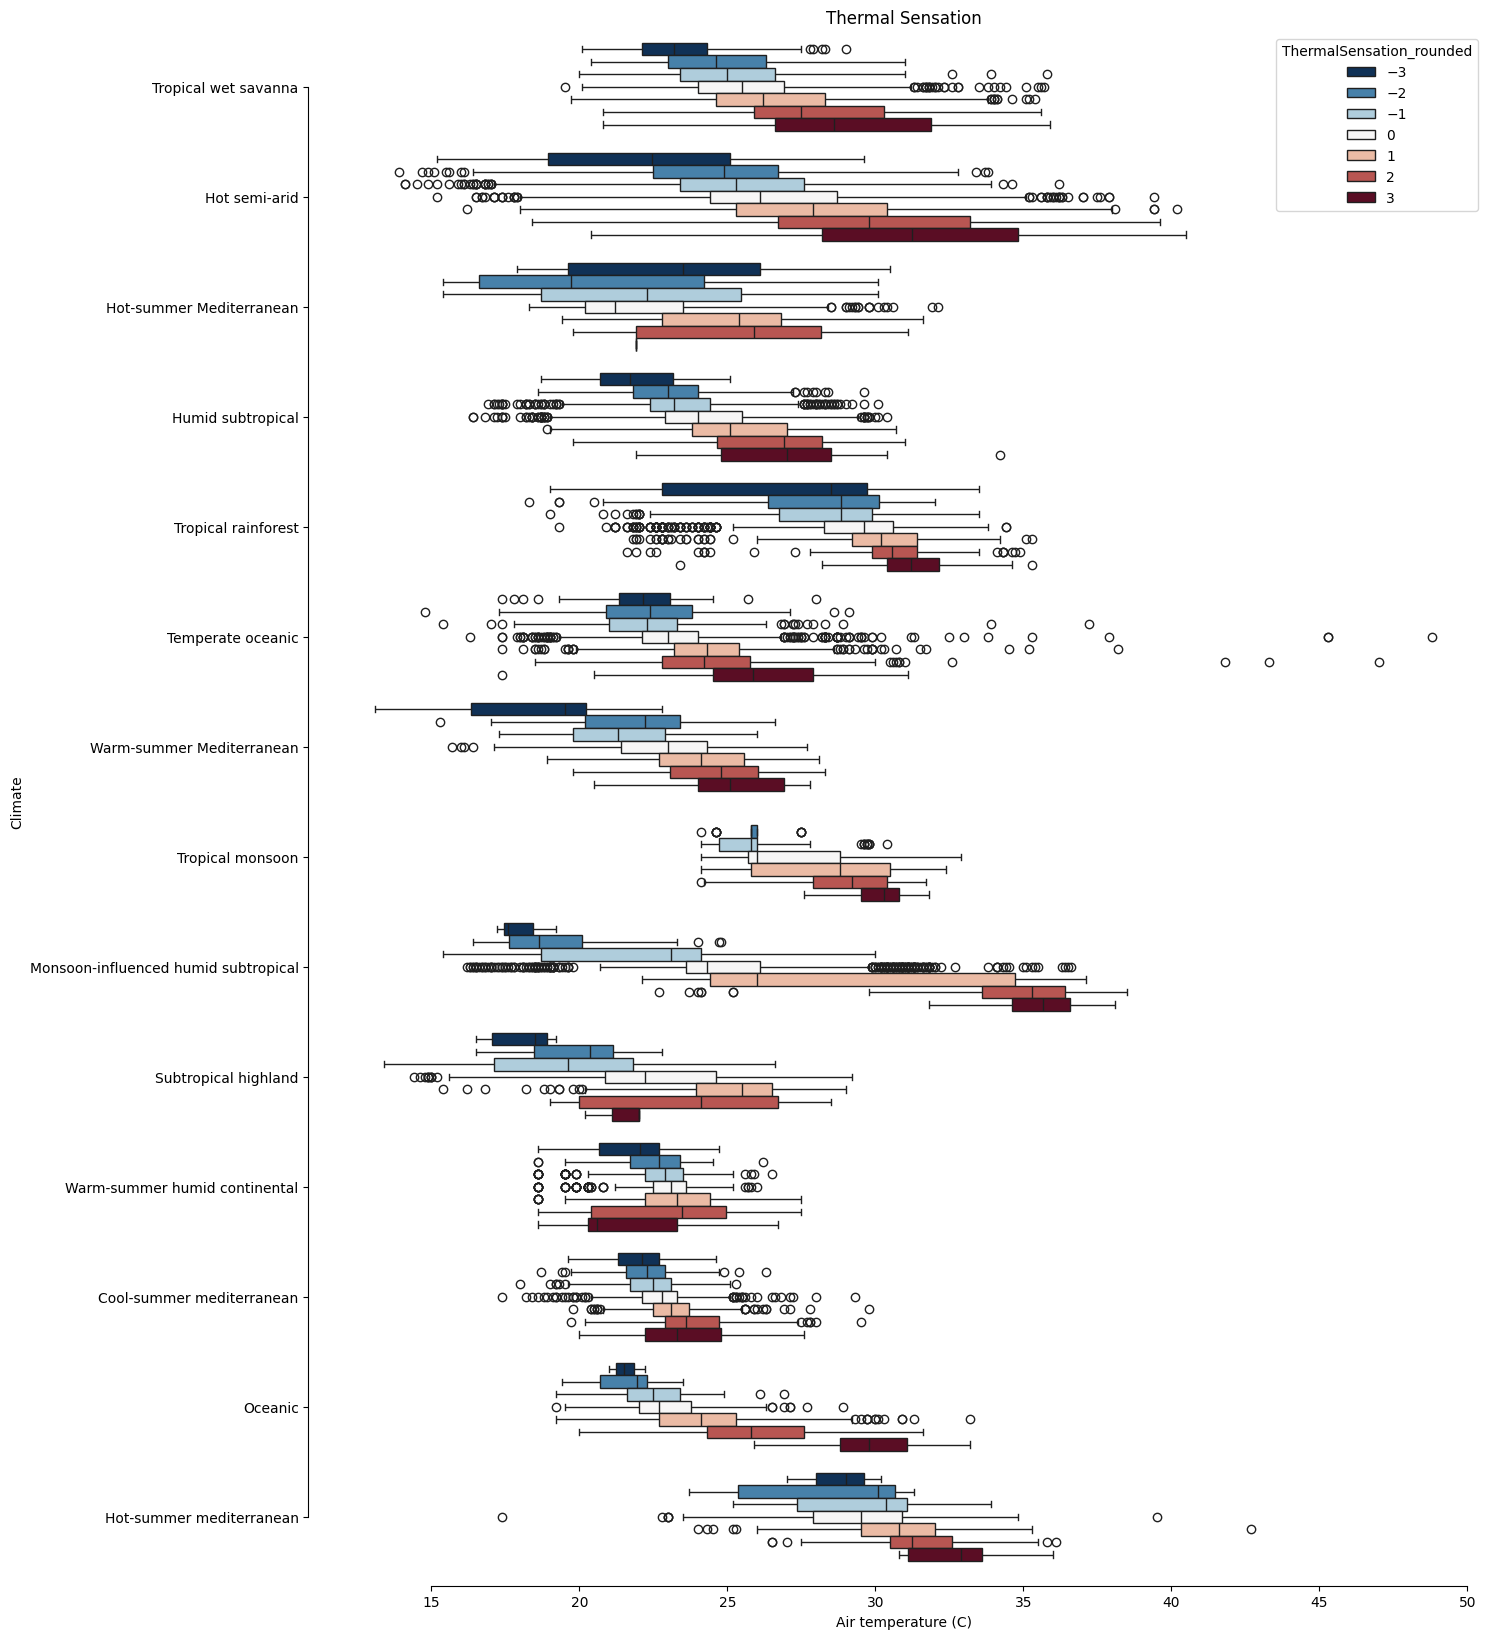

In [23]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,20)
sns.boxplot(y="Climate", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Climate","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

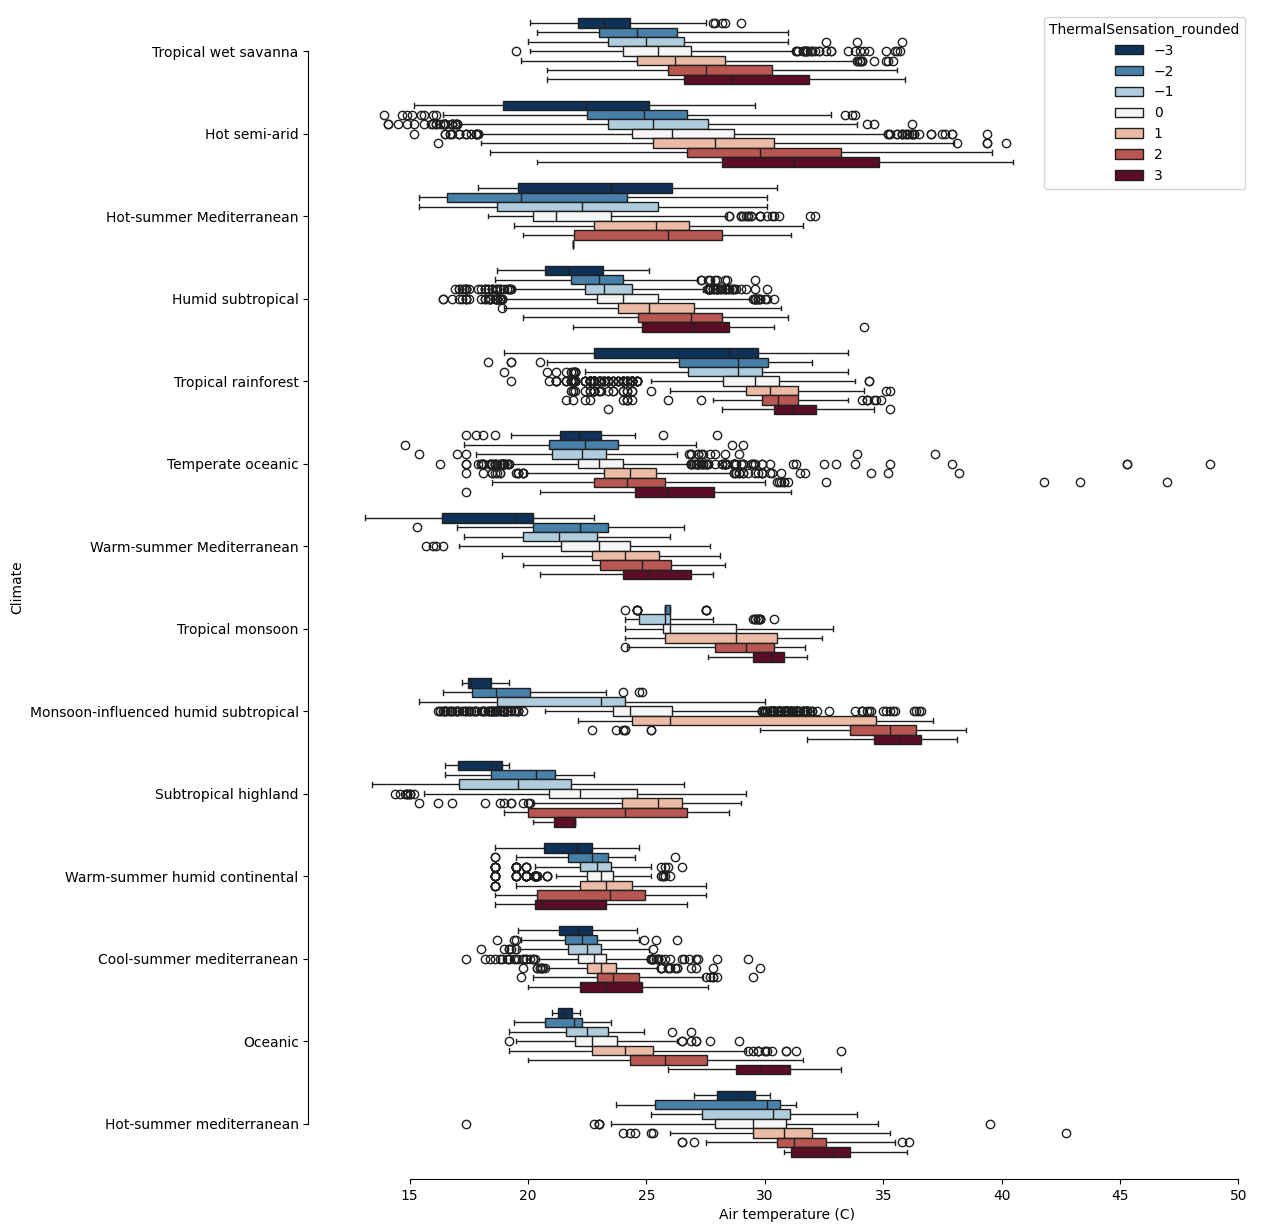

In [24]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12,15)
sns.boxplot(y="Climate", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Climate","Air temperature (C)","ThermalSensation_rounded"]].dropna())

sns.despine(offset=10, trim=True)

# Using other distribution-based visualizations from Seaborn

There are several other graphics that can be used to show distributions using seaborn: https://seaborn.pydata.org/examples/index.html